In [1]:
import numpy as np
import pandas as pd
import plotnine as pn
from rdot import ba
from rdot import distortions

/Users/nathanielimel/uci/projects/rdot/src/rdot/ba.py:381: SyntaxWarning: invalid escape sequence '\m'


### Hamming

In [2]:
x = np.array([0,1]) # Binary input
xhat = np.array([0,1]) # Binary reconstruction
p = 0.5 # P(X=1) = p
px = np.array([1-p, p])

# distortion matrix
dist_mat = distortions.hamming(*np.meshgrid(x, xhat))        

# Test many values of beta to sweep out a curve. 
betas = np.logspace(-5, 5, num=100)        

optimizer = ba.RateDistortionOptimizer(
    px, dist_mat, betas,
)
rd_values = [(result.rate, result.distortion, result.beta) for result in optimizer.get_results()]

100%|██████████| 100/100 [00:00<00:00, 5894.52it/s]


In [3]:
rd_values[20]

(1.9791947636349505e-07, 0.49973809608575587, 0.001047615752789665)

In [4]:
data = pd.DataFrame(rd_values, columns=["rate", "distortion", "beta"])
# data

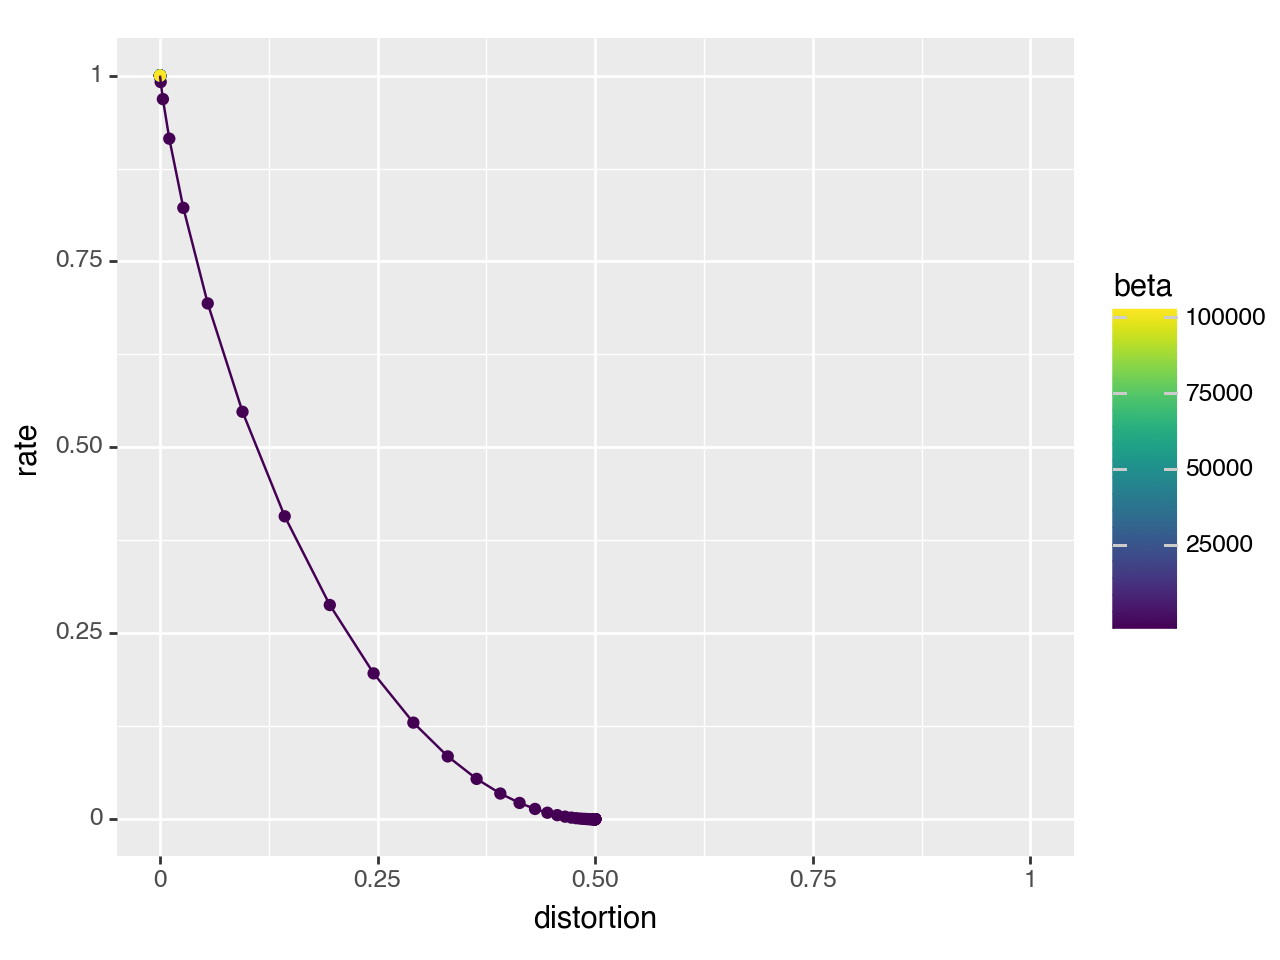

<Figure Size: (640 x 480)>

In [5]:
# Compare to figure 10.4 of Cover and Thomas
(
    pn.ggplot(data, pn.aes(x="distortion", y="rate", color="beta"))
    + pn.geom_point()
    + pn.geom_line()
    + pn.xlim(0,1)
)

### Gaussian

In [6]:
# (truncated) Gaussian input with quadratic distortion
x = np.linspace(-5,5,1000) # source alphabet
xhat = np.linspace(-5,5,1000) # reconstruction alphabet
px = 1/(2*np.pi) * np.exp(-x ** 2 / 2) # source pdf
px /= px.sum() # guess we actually need this

dist_mat = distortions.quadratic(x, xhat)


# Test many values of beta to sweep out a curve. 
betas = np.logspace(-5, 10, num=100)        

optimizer = ba.RateDistortionOptimizer(
    px, dist_mat, betas,
)
rd_values = [(result.rate, result.distortion, result.beta) for result in optimizer.get_results()]

100%|██████████| 100/100 [00:41<00:00,  2.38it/s]


In [7]:
data = pd.DataFrame(rd_values, columns=["rate", "distortion", "beta"])
# data

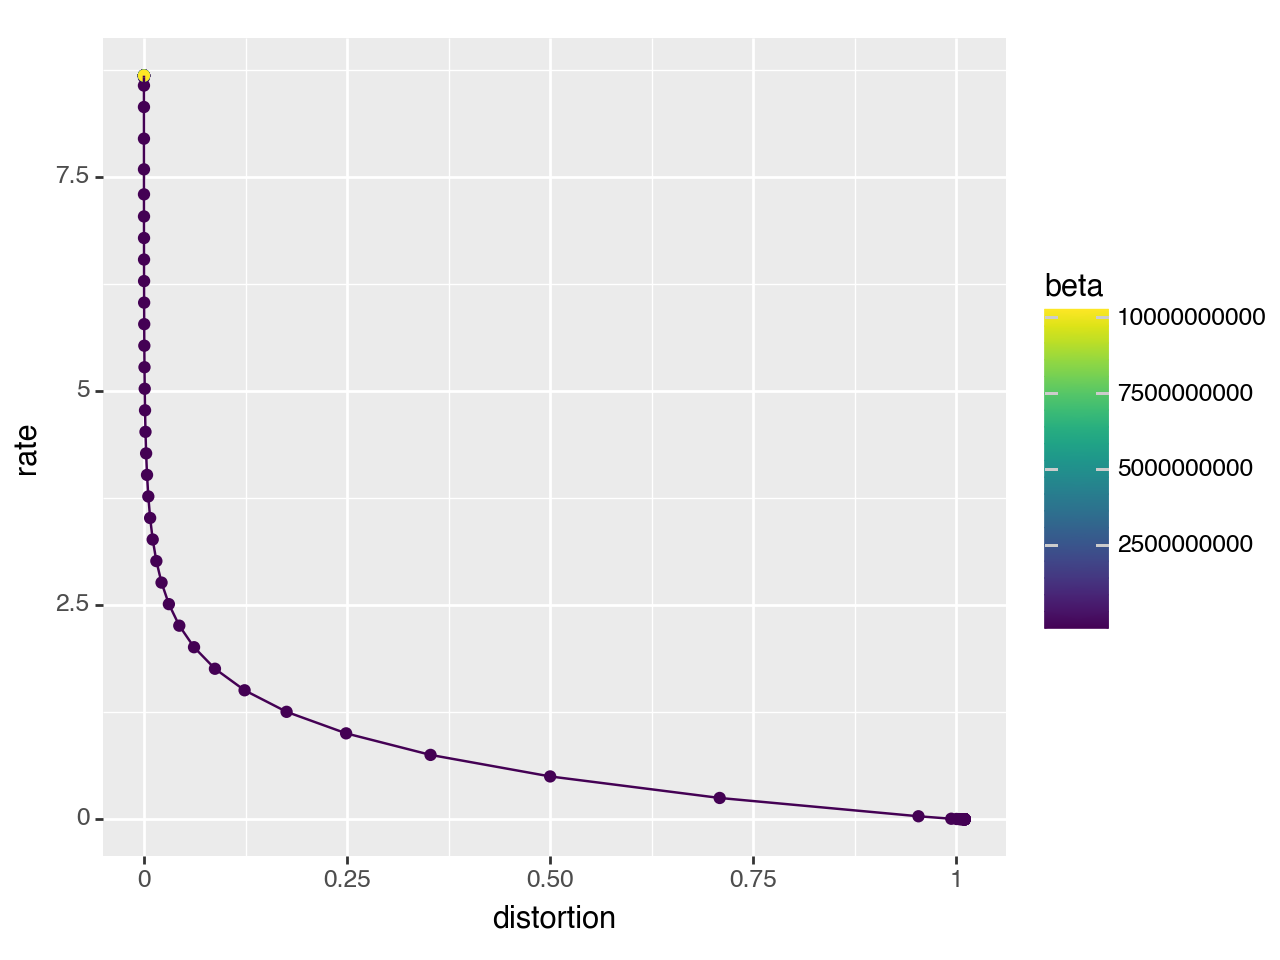

<Figure Size: (640 x 480)>

In [8]:
# Compare to figure 10.4 of Cover and Thomas
(
    pn.ggplot(data, pn.aes(x="distortion", y="rate", color="beta"))
    + pn.geom_point()
    + pn.geom_line()
)

## IB

In [2]:
# define each p(y|x) to be a gaussian
py_x = np.array([[np.exp(-(i - j)**2) for j in range(10)] for i in range(10)])
py_x /= py_x.sum(axis=1)[:, None]
# get joint by multiplying by p(x)
px = np.full(py_x.shape[0], 1/10)
pxy = py_x * px

# Test many values of beta to sweep out a curve. 
betas = np.logspace(-2, 5, num=100)

optimizer = ba.IBOptimizer(pxy, betas)
rd_values = [
    (result.rate, result.distortion, result.accuracy, result.beta) for result in optimizer.get_results() if result is not None
]


  0%|          | 0/100 [00:00<?, ?it/s]

/Users/nathanielimel/uci/projects/rdot/src/rdot/ba.py:88: RuntimeWarning: divide by zero encountered in log
100%|██████████| 100/100 [00:00<00:00, 752.16it/s]


In [3]:
data = pd.DataFrame(
    rd_values, 
    columns=[
        "rate", 
        "distortion",
        "accuracy",
        "beta",
    ]
)
data

,rate,distortion,accuracy,beta
0,-1.332268e-14,1.912028e+00,-1.421085e-14,0.010000
1,-1.332268e-14,1.912028e+00,-1.421085e-14,0.011768
2,-1.243450e-14,1.912028e+00,-1.421085e-14,0.019179
3,3.528718e-07,1.912027e+00,9.960607e-07,0.422924
4,3.104852e-06,1.912025e+00,6.328405e-06,0.497702
5,1.424403e-05,1.912015e+00,2.096382e-05,0.585702
6,8.149735e-05,1.911950e+00,8.660994e-05,0.689261
7,7.551571e-01,1.216418e+00,6.956428e-01,0.811131
8,1.247978e+00,8.226714e-01,1.089367e+00,0.954548
9,1.548803e+00,6.203598e-01,1.291678e+00,1.123324


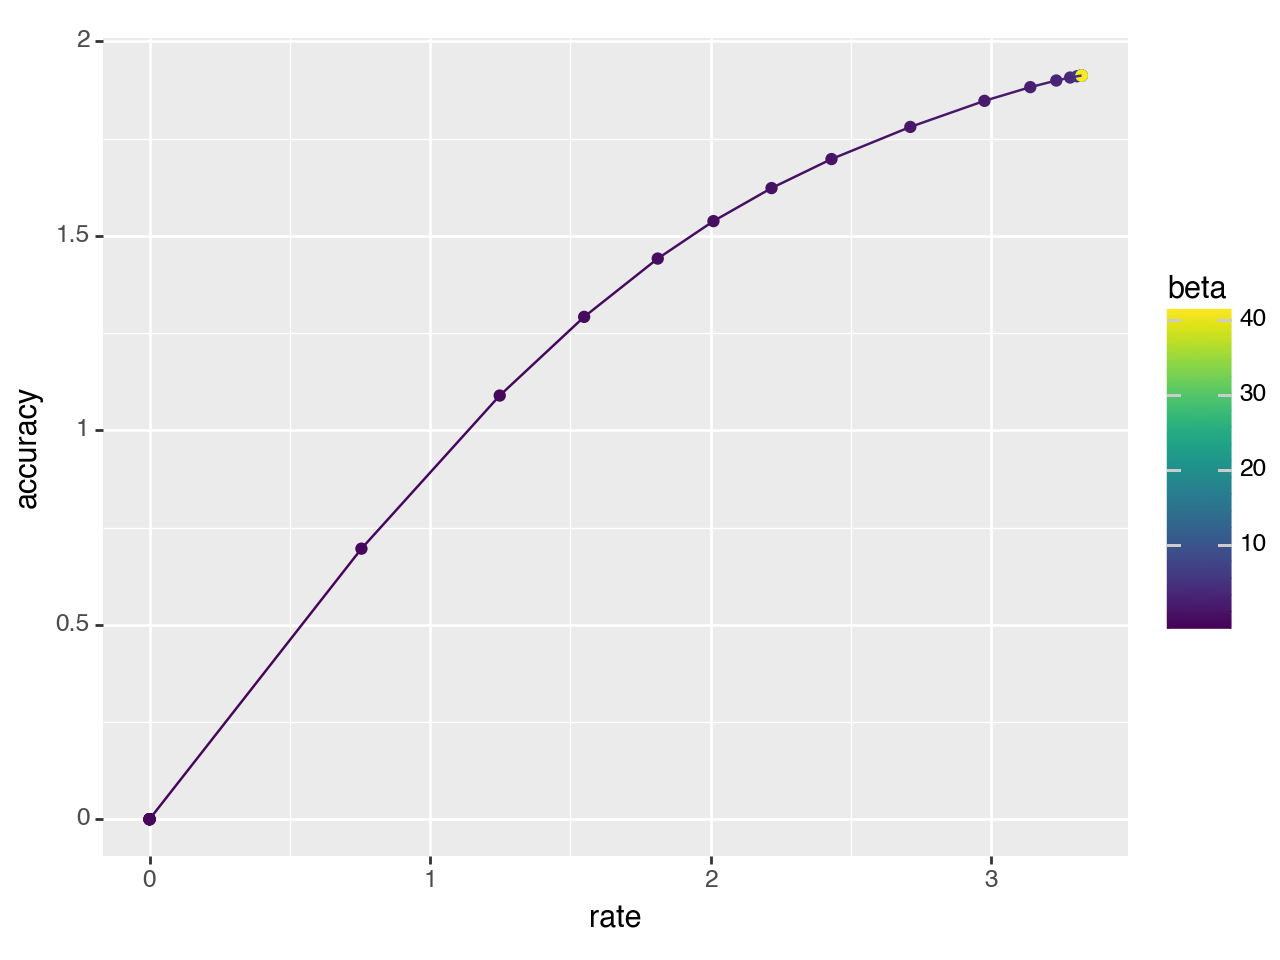

<Figure Size: (640 x 480)>

In [4]:
(
    pn.ggplot(data, pn.aes(x="rate", y="accuracy", color="beta"))
    + pn.geom_point()
    + pn.geom_line()
)

## Embo validation

In [5]:
from embo import InformationBottleneck

In [6]:
result = InformationBottleneck(
    pxy=pxy,
).get_bottleneck()

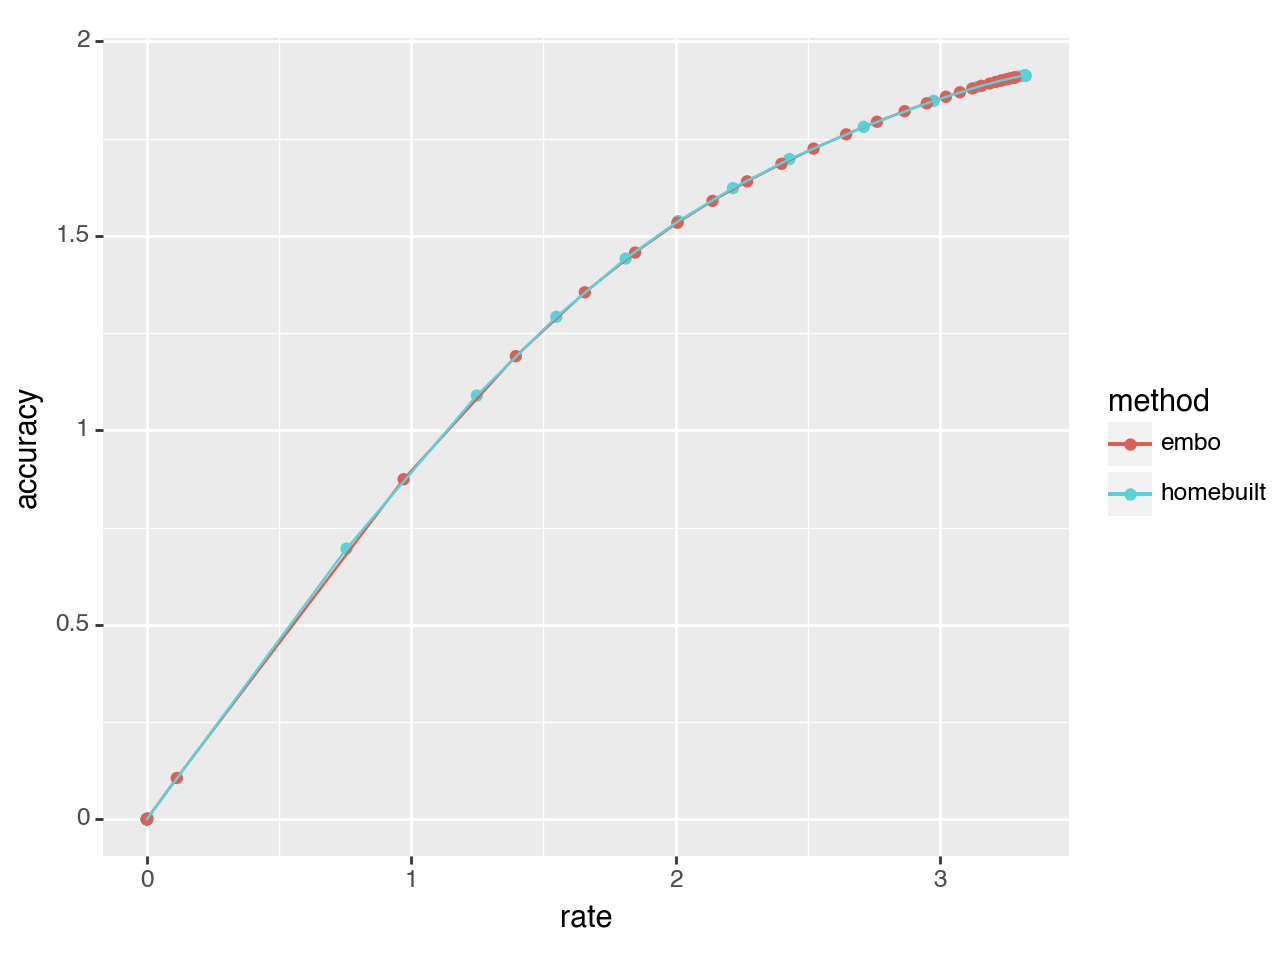

<Figure Size: (640 x 480)>

In [7]:
data["method"] = "homebuilt"
data_embo = pd.DataFrame(zip(*result[0:2]), columns=["rate", "accuracy"])
data_embo["method"] = "embo"
data = pd.concat([data, data_embo])
(
    pn.ggplot(data, pn.aes(x="rate", y="accuracy", color="method"))
    + pn.geom_point()
    + pn.geom_line()    
)

Additional distribution testing

In [8]:
# As noga suggested
py_x = np.array(
    [[0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1], 
     [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]]
).T
py_x /= py_x.sum(axis=1)[:, None]
# get joint by multiplying by p(x)
px = np.full(py_x.shape[0], 1/9)
pxy = py_x * px[:,None]

# Test many values of beta to sweep out a curve. 
betas = np.logspace(-2, 5, num=100)
# betas = np.linspace(1e-5, 5, num=100)

optimizer = ba.IBOptimizer(pxy, betas)
rd_values = [
    (result.rate, result.distortion, result.accuracy, result.beta) for result in optimizer.get_results()
    if result is not None
]


100%|██████████| 100/100 [00:00<00:00, 1043.87it/s]


In [9]:
data = pd.DataFrame(
    rd_values, 
    columns=[
        "rate", 
        "distortion",
        "accuracy",
        "beta",
    ]
)
# data

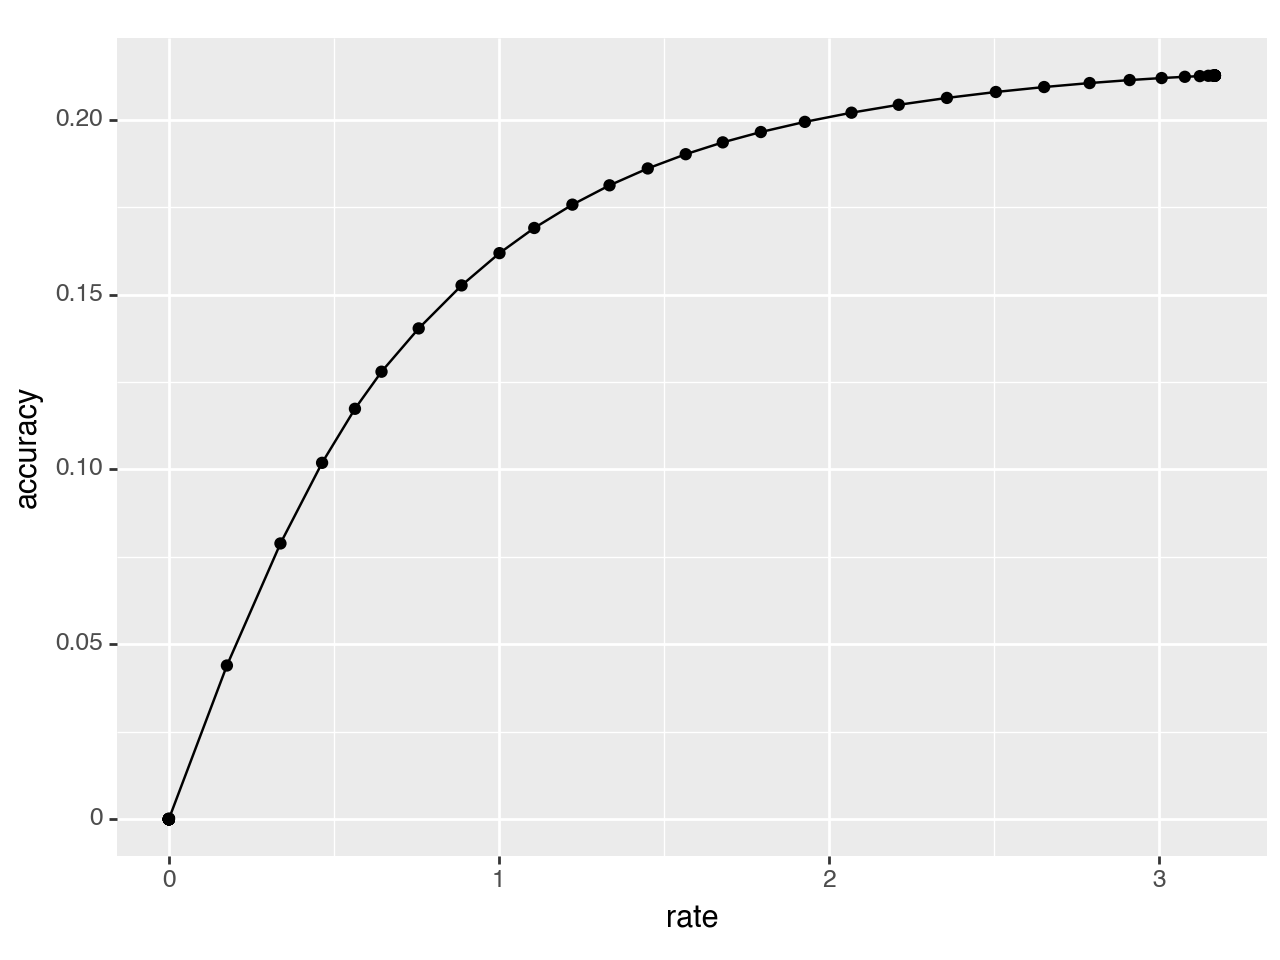

<Figure Size: (640 x 480)>

In [10]:
(
    pn.ggplot(data, pn.aes(x="rate", y="accuracy"))
    + pn.geom_point()
    + pn.geom_line()
)

In [11]:
result = InformationBottleneck(
    pxy=pxy,
).get_bottleneck()

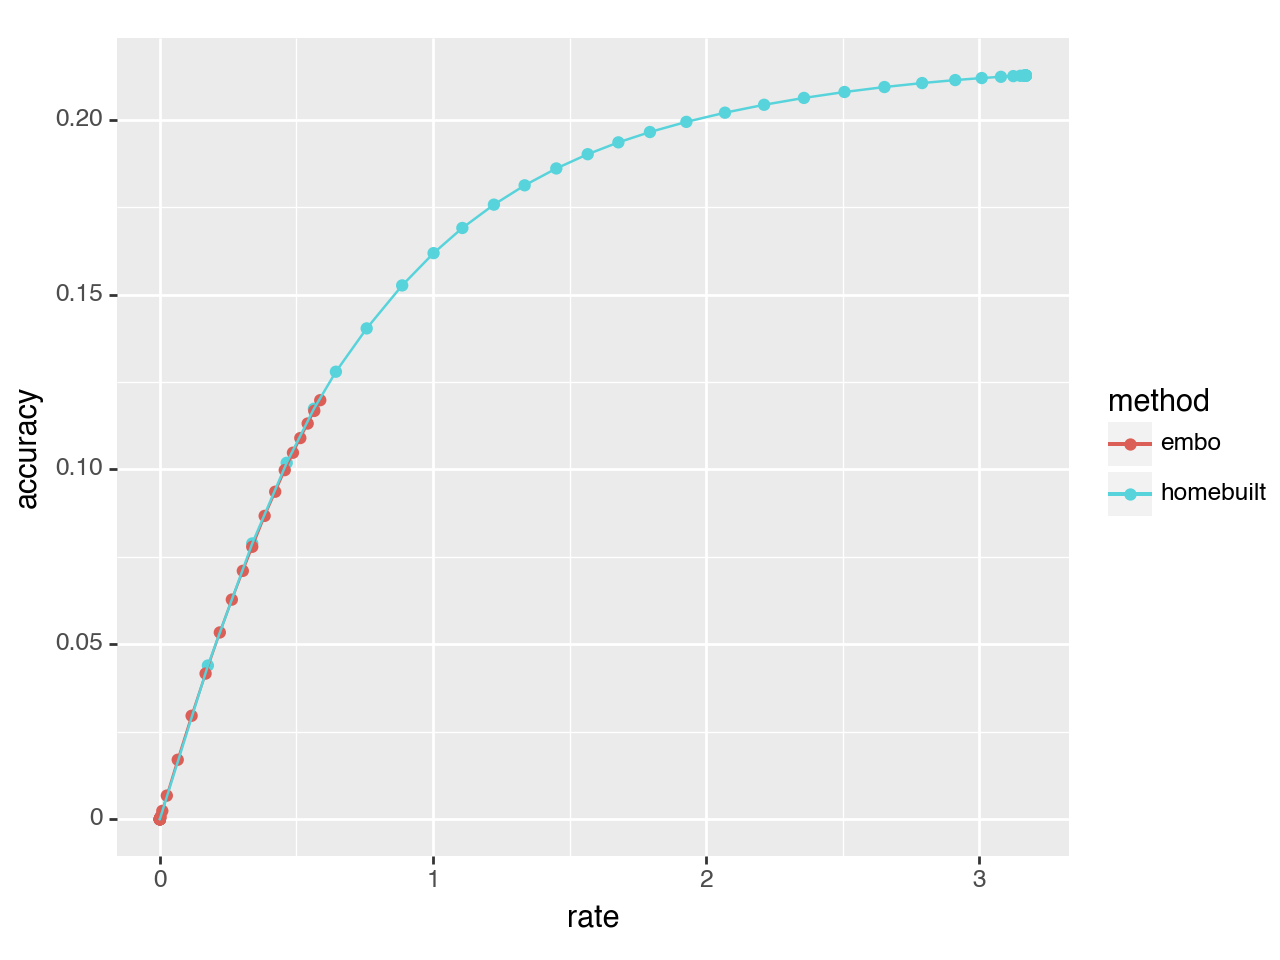

<Figure Size: (640 x 480)>

In [12]:
data["method"] = "homebuilt"
data_embo = pd.DataFrame(zip(*result[0:2]), columns=["rate", "accuracy"])
data_embo["method"] = "embo"
data = pd.concat([data, data_embo])
(
    pn.ggplot(data, pn.aes(x="rate", y="accuracy", color="method"))
    + pn.geom_point()
    + pn.geom_line()    
)

In [13]:
# Should be a trivial bound, since I[X:Xhat] = I[Xhat:Y]

# Medin and Schaffer deterministic category labels
py_x = np.array(
    [
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
    ]
)
py_x /= py_x.sum(axis=1)[:, None]
# get joint by multiplying by p(x)
px = np.full(py_x.shape[0], 1/py_x.shape[0])
pxy = py_x * px[:, None]

In [23]:
betas = np.logspace(-2, 5, num=30)

optimizer = ba.IBOptimizer(pxy, betas)
rd_values = [
    (result.rate, result.distortion, result.accuracy, result.beta) for result in optimizer.get_results()
    if result is not None
]

100%|██████████| 30/30 [00:00<00:00, 1694.05it/s]


In [24]:
data = pd.DataFrame(
    rd_values, 
    columns=[
        "rate", 
        "distortion",
        "accuracy",
        "beta",
    ]
)
data

,rate,distortion,accuracy,beta
0,-2.664535e-15,9.910761e-01,-2.664535e-15,0.010000
1,-2.664535e-15,9.910761e-01,-1.776357e-15,0.017433
2,9.910752e-01,1.172209e-06,9.910761e-01,0.489390
3,9.910761e-01,4.009045e-17,9.910761e-01,0.853168
4,9.910761e-01,2.336854e-17,9.910761e-01,1.487352
5,9.910761e-01,2.336854e-17,9.910761e-01,2.592944
6,9.910761e-01,2.336854e-17,9.910761e-01,4.520354
7,9.910761e-01,2.336854e-17,9.910761e-01,7.880463
8,9.910761e-01,2.336854e-17,9.910761e-01,13.738238
9,9.910761e-01,2.336854e-17,9.910761e-01,23.950266


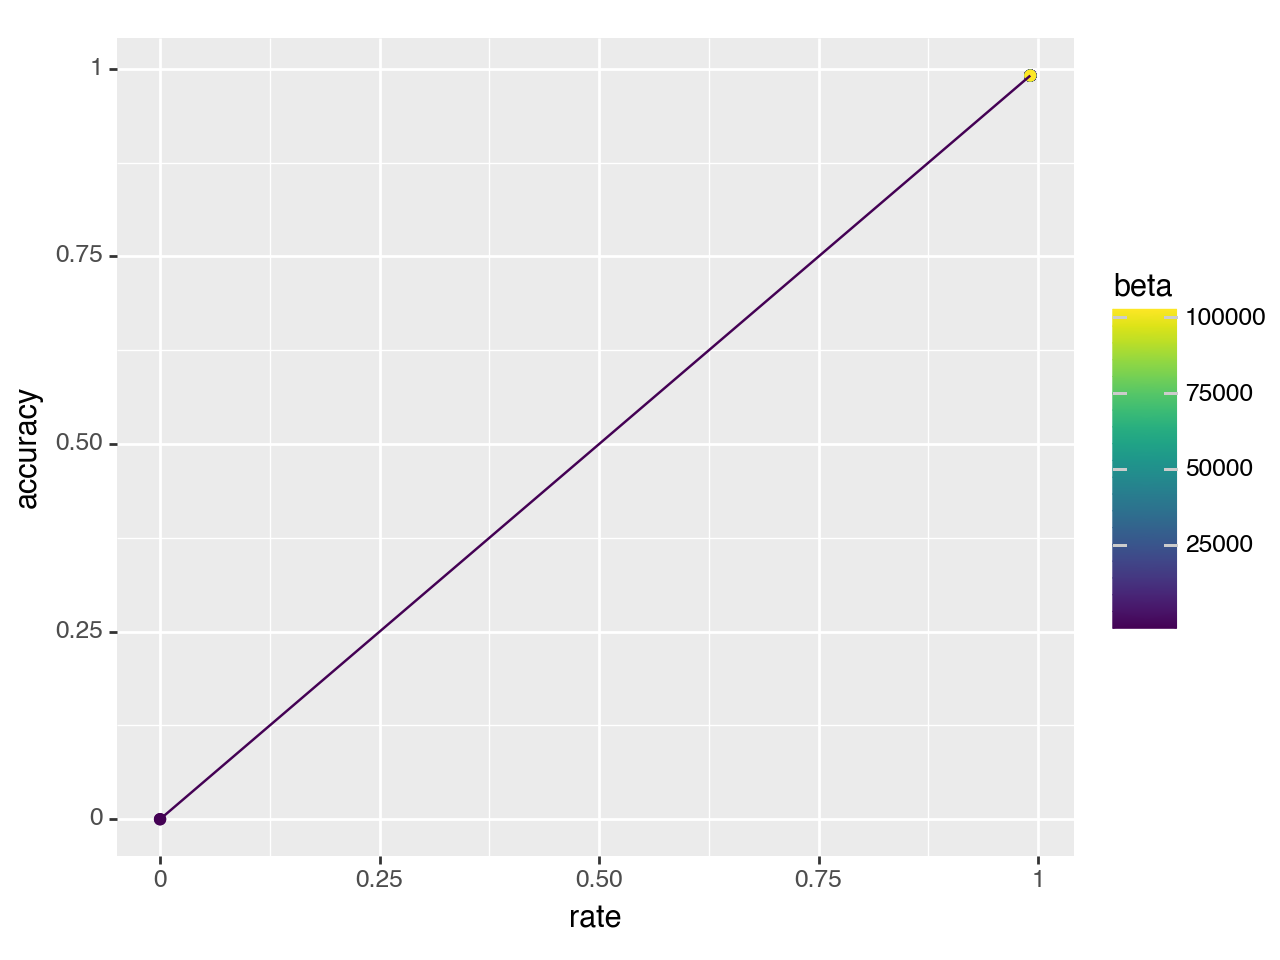

<Figure Size: (640 x 480)>

In [25]:
(
    pn.ggplot(data, pn.aes(x="rate", y="accuracy", color="beta"))
    + pn.geom_point()
    + pn.geom_line()
)

In [26]:
result = InformationBottleneck(
    pxy=pxy,
).get_bottleneck()

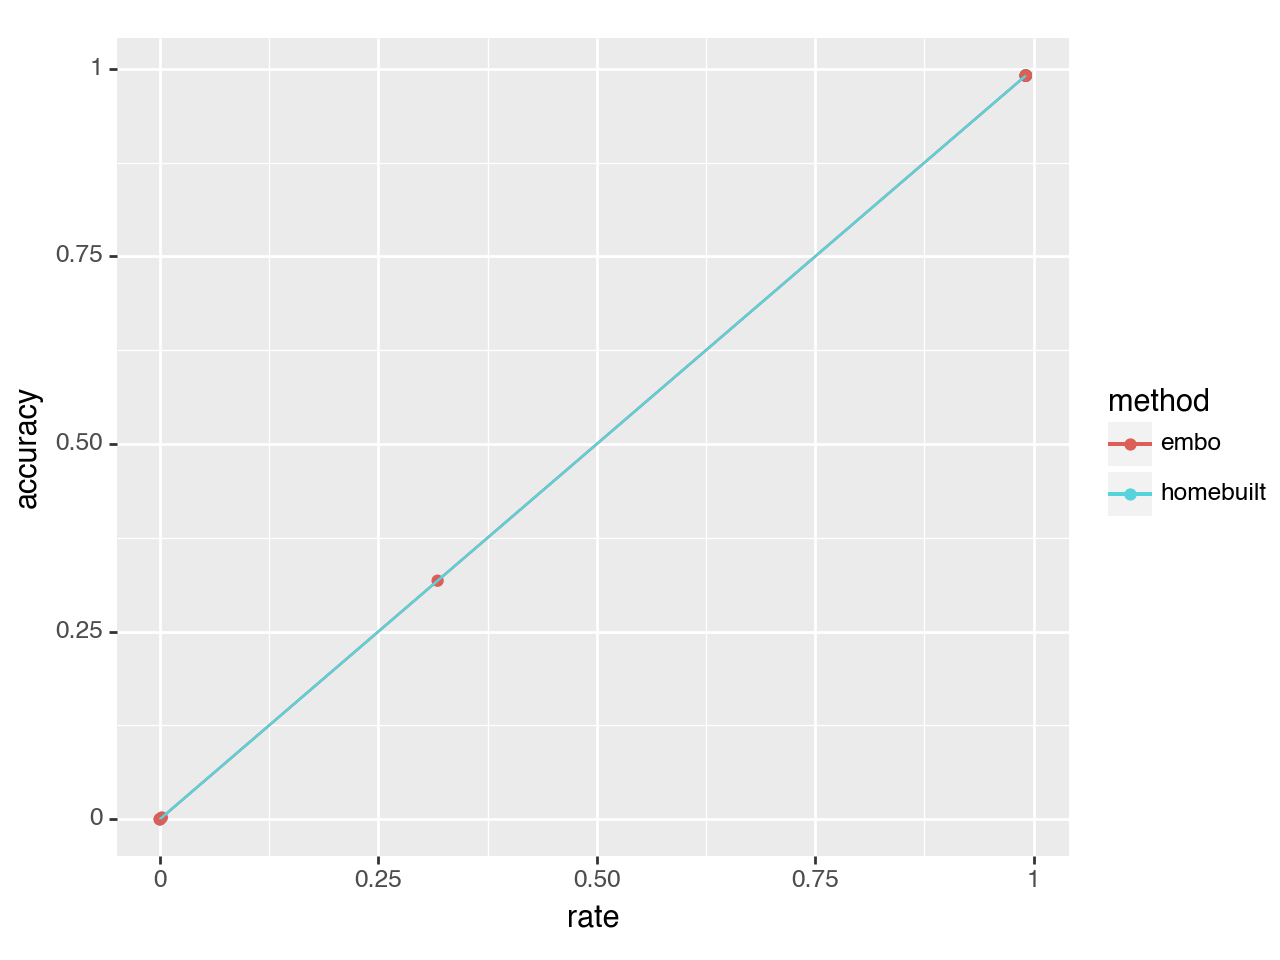

<Figure Size: (640 x 480)>

In [27]:
data["method"] = "homebuilt"
data_embo = pd.DataFrame(zip(*result[0:2]), columns=["rate", "accuracy"])
data_embo["method"] = "embo"
data = pd.concat([data, data_embo])
(
    pn.ggplot(data, pn.aes(x="rate", y="accuracy", color="method"))
    + pn.geom_point()
    + pn.geom_line()    
)